Name : Vrushaket Chaudhari
    
Roll No.: 31305

Class: TE03
    
Batch: K3
    
Subject: DSBDAL
    
Assignment No.: 4

## Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

## Import Required Libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load Boston Dataset

In [13]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [25]:
dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [26]:
dataset['MEDV'] = boston_dataset.target 

In [27]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Dropping NaN value from dataset

In [19]:
dataset = dataset.dropna(axis = 0, how ='any')

In [20]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Visualization of Correlation Matrix

<AxesSubplot:>

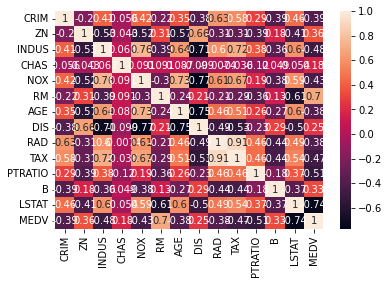

In [32]:
sns.heatmap(data=dataset.corr(), annot=True)

## Preparing dataset for Training 

In [33]:
X = pd.DataFrame(np.c_[dataset['LSTAT'],dataset['RM']],columns=['LSTAT','RM'])
Y = dataset['MEDV']

## Splitting dataset for Training and Testing

In [34]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Training and Testing the Model

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [50]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE : {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE : {}'.format(rmse))


The model performance for training set
--------------------------------------
RMSE : 5.637129335071195


The model performance for testing set
--------------------------------------
RMSE : 5.137400784702911
